##Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, accuracy_score

## 1. Import dataset and search for missing value

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/insurance-cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,39.207025,30.657481,1.094918,13270.422265
std,14.049960,6.100714,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4740.287150
50%,39.000000,30.380000,1.000000,9382.033000
75%,51.000000,34.681250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- search missing value:
dapat kita lihat terdapat missing value pada bmi dan smoker

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      2
region      0
charges     0
dtype: int64

cek dan mengisi nilai data yang null menjadi 0 terlebih dahulu dengan fillna agar tidak ada data yang "null"

In [ ]:
missing_df = df[df.isnull().any(1)]
missing_df = missing_df.fillna(0)
missing_df

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.60,5,0,southwest,4687.7970
53,36,male,34.43,0,0,southeast,37742.5757


concat dataframe untuk mengganti nilai 0 yang ada pada data set menjadi syarat soal 1b. dimana variable bersifat continous yaitu bmi diisi dengan nilai mean sedangkan variable categorical diisi dengan nilai modus. 

Pengisian missing values juga mempertimbangkan jenis kelamin. Artinya, jika nilai
variabel yang kosong adalah milik pemegang asuransi berjenis kelamin pria, maka
nilai modus atau mean hanya dihitung terhadap samples berjenis kelamin pria

In [ ]:
data_m = df[df['sex'] == 'male']
data_f = df[df['sex'] == 'female']

for x in missing_df.index:
  if missing_df.at[x,'sex'] == 'male' :
    if missing_df.at[x,'bmi'] == 0:
      missing_df.at[x, 'bmi'] == data_m['bmi'].mean()
      print("bmi data for male successfully updated!")
    else:
      missing_df.at[x, 'smoker'] == data_m['smoker'].mode()[0]
      print("smoker data for male successfully updated!")
  else:
    if missing_df.at[x,'bmi'] == 0:
      missing_df.at[x, 'bmi'] == data_f['bmi'].mean()
      print("bmi data for female successfully updated!")
    else:
      missing_df.at[x, 'smoker'] == data_f['smoker'].mode()[0]
      print("smoker data for female successfully updated!")

missing_df

smoker data for female successfully updated!
smoker data for male successfully updated!


,age,sex,bmi,children,smoker,region,charges
32,19,female,28.60,5,0,southwest,4687.7970
53,36,male,34.43,0,0,southeast,37742.5757


setelah data berhasil terupdate, dan missing value sudah diganti maka akan lanjut dengan menggabungkan data yang sudah diupdate dengan data sebelumnya yang belum diupdate nilainya

In [ ]:
df = df.dropna()
df = pd.concat([df, missing_df])
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030
32,19,female,28.600,5,0,southwest,4687.79700


 Visualize data (1c & id)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ignored

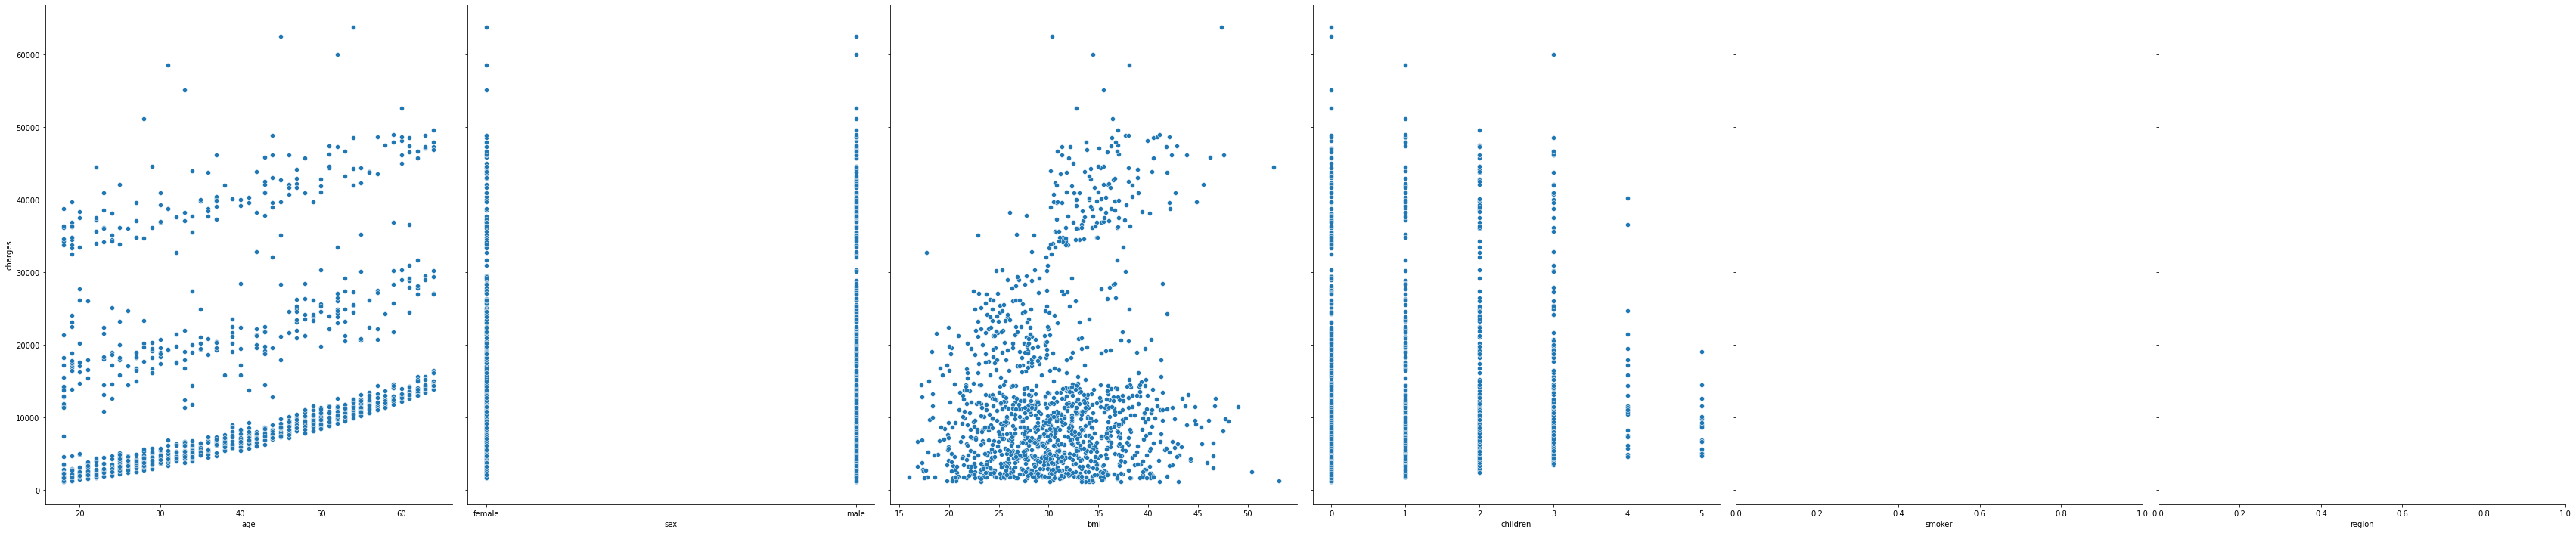

In [ ]:
#sns.pairplot(df, x_vars=['age','sex','bmi','children','smoker','region'], y_vars='charges', size=10, aspect=0.8)

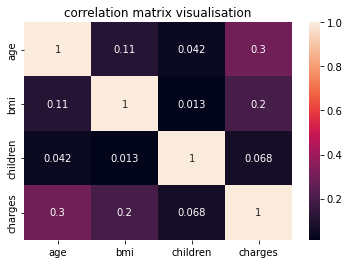

In [ ]:

sns.heatmap(data=df.corr(), annot=True)
plt.title("correlation matrix visualisation")
plt.show()

menggunakan correlation matrix untuk menunjukkan pengaruh variable independent pada hasil variable independent dapat dilihat hubungannya < 0.5

## 2. Splitting data set

Memecah data tersebut menjadi 2 data yaitu x_data dan y_data yang kemudian data tsb di pecah lagi menjadi x_train, x_test, y_train, y_test yang tujuannya untuk testing dan learning setelah itu x_test dan y_train di trainning dengan linear regression. Setelah itu dengan memprediksi x_test kita mendapatkan hasil prediksi yang di simpan dengan y_pred



In [ ]:
# variabel yang ada dipisahkan menjadi X yaitu independent variable dan y yaitu dependent variable
X = df.iloc[:, :-1]    
y = df.iloc[:, -1]     


Pada bagian ini saya akan mengubah data yang berbentuk category seperti **region, smoker, dan sex** menjadi data numeric dengan boolean 0 or 1 menggunakan get_dummies

In [ ]:
region = pd.get_dummies(X['region'], drop_first = True)
region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
smoker = pd.get_dummies(X['smoker'], drop_first = True)
smoker.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
sex = pd.get_dummies(X['sex'], drop_first = True)
sex.head()

,male
0,0
1,1
2,1
3,1
4,1


Pada umumnya kita melakukan drop data setelah memecah menjadi dua variable independent dan dependent. namun karena ada beberapa data yang harus diubah menjadi numeric maka baru saya drop disini. sama seperti yang sebelumnya data yang lama akan dihilangkan kemudian digabungkan kembali dengan data yang baru.

In [ ]:
X.head()

,age,bmi,children,northwest,southeast,southwest,no,yes,male
0,19,27.900,0,0,0,1,0,1,0
1,18,33.770,1,0,1,0,1,0,1
2,28,33.000,3,0,1,0,1,0,1
3,33,22.705,0,1,0,0,1,0,1
4,32,28.880,0,1,0,0,1,0,1


In [ ]:
X = X.drop('region', axis = 1)
X = X.drop('smoker', axis = 1)
X = X.drop('sex', axis = 1)


In [ ]:
X = pd.concat([X, region], axis = 1)
X = pd.concat([X, smoker], axis = 1)
X = pd.concat([X, sex], axis = 1)


standarization dilakukan agar data tidak overfitting

In [ ]:
stc = StandardScaler()
X = stc.fit_transform(X)

In [ ]:
print(X[:5])

[[-1.43876426 -0.45250076 -0.90861367 -0.56641788 -0.61132367  1.76548098
  -1.96607593  1.97511997 -1.0105187  -0.56641788 -0.61132367  1.76548098
  -1.96607593  1.97511997 -1.0105187 ]
 [-1.50996545  0.51076216 -0.07876719 -0.56641788  1.63579466 -0.56641788
   0.50862736 -0.50629836  0.98959079 -0.56641788  1.63579466 -0.56641788
   0.50862736 -0.50629836  0.98959079]
 [-0.79795355  0.38440569  1.58092576 -0.56641788  1.63579466 -0.56641788
   0.50862736 -0.50629836  0.98959079 -0.56641788  1.63579466 -0.56641788
   0.50862736 -0.50629836  0.98959079]
 [-0.4419476  -1.30499666 -0.90861367  1.76548098 -0.61132367 -0.56641788
   0.50862736 -0.50629836  0.98959079  1.76548098 -0.61132367 -0.56641788
   0.50862736 -0.50629836  0.98959079]
 [-0.51314879 -0.29168345 -0.90861367  1.76548098 -0.61132367 -0.56641788
   0.50862736 -0.50629836  0.98959079  1.76548098 -0.61132367 -0.56641788
   0.50862736 -0.50629836  0.98959079]]


In [ ]:
# sesuai dengan soal, data yang digunakan untuk training sebesar 80% dan tes sebesar 20% atau 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# menampilkan hasil dari train dan test set
print('Train size:', X_train.shape)
print('Test size:', X_test.shape)

Train size: (1070, 15)
Test size: (268, 15)


## 3.  Linear Regression

dengan menggunakan metode gradient decent karena gradient decent memberikan nilai optimum m dan c dari linear regression. Dengan nilai m dan c ini, kita akan mendapatkan persamaan garis yang paling cocok dan siap untuk membuat prediksi

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_transform=sc.fit_transform(X_train)

In [ ]:
class gradient_descent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def predict(self, X, theta, intercept):
    return np.array(intercept + np.dot(X, theta))

  def update_theta(self, X, y, y_pred, alpha):
    deriv_theta = (2/len(y)) * np.dot((y_pred - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_pred, alpha):
    deriv_intercept = (2/len(y)) * np.sum(y_pred - y)
    return self.intercept - (alpha * deriv_intercept)

  def get_MSE(self, y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.get_MSE(y, y_pred))

    return loss

In [ ]:
all_loss = []

for alpha in [0.0005, 0.001, 0.005, 0.01]:
  model = gradient_descent(X.shape[1])
  epochs = 5000
  loss = model.fit(X_transform, y_train, epochs, alpha)

  all_loss.append([alpha, loss])

menunjukkan plot hasil dari nilai loss

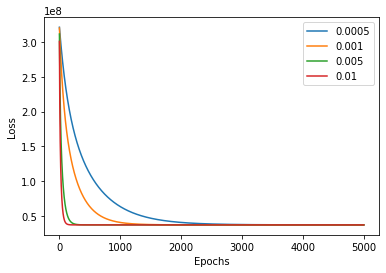

In [ ]:
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = gradient_descent(X.shape[1])
epochs = 5000
_ = model.fit(X_transform, y_train, epochs, 0.01)

In [ ]:
print(f'Intercept: {model.intercept}')
print(f'Theta: {model.theta}')

Intercept: 13267.48321225136
Theta: [ 3654.8788538   1991.04347452   543.93730168  -141.68357184
  -262.52937999  -243.49180734 -2885.77573536  1932.08308083
    16.479705    -140.77803115  -263.12680013  -244.22328982
 -2887.55336402  1931.16387603    14.7927746 ]


In [ ]:
w = model.theta
b = model.intercept

In [ ]:
def final_predict(X):
  return b + np.dot(X, w)

selanjutnya kita akan meng-compare hasil prediksi tersebut dan nilai sebenarnya dari test set

In [ ]:
y_pred = final_predict(sc.transform(X_test))
compare = pd.DataFrame({
    'y_pred': y_pred,
    'y_true': y_test
})

compare.head()

,y_pred,y_true
580,12571.024317,12913.99240
612,3849.682025,2207.69745
571,4444.176215,2219.44510
1036,29848.830561,37484.44930
200,3123.479397,2130.67590


## 4. Evaluation

membuat plot dengan perbandingan komparasi ground truth dengan prediction

In [ ]:
#plt.scatter(compare['y_pred'], compare['y_true'])
#p1 = max(max(y_test), max(y_pred))
#p2 = min(min(y_test), min(y_pred))

#plt.plot([p1, p2], [p1, p2], 'b-')
#plt.xlabel('Profit (Ground Truth)', fontsize=15)
#plt.ylabel('Profit (Predictions)', fontsize=15)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
print ("MSE :", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print ("RMSE :", RMSE)

score = r2_score(y_test, y_pred)
print ("R2 :", score)

MSE : 34017647.25402932
RMSE : 5832.464938088297
R2 : 0.7712656261468007


Dari hasil di atas dapat dilihat ada:
Mean Squared Error = merata-ratakan hasil perbedaan antara predicted dan target yang di kuadratsehingga error yang di hasilkan akan lebih besar. 
Root Mean Squared Error = memperlihatkan hasil MSE yang di akar sehingga hasil error nya tidak terlalu besar.

hasil MSE yang ada di atas adalah 34017647.25402932

hasil RMSE yang ada di atas adalah 5832.464938088297

hasil R2 yang ada di atas adalah 0.7712656261468007

Plot hasil

In [ ]:
plt.scatter(y_test,  color='blue')
plt.plot(x_test, y_pred, color='grey', linewidth=2)
plt.show()

NameError: ignored